::: {.content-hidden}

Note! This document in is partly in `quarto`-flavored markdown and can be used with the `quarto` package to generate a rendered version overview. For this reason you will see occasional raw cells and things like the first line of this cell that will render oddly as a plain jupyter notebook.

# Overview of `svgling`

Author: **Kyle Rawlins, [kgr@jhu.edu](kgr@jhu.edu)**
:::

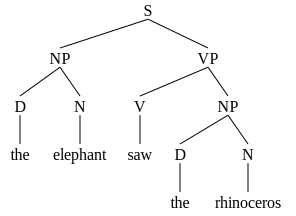

In [37]:
#| echo: false
svgling.draw_tree(("S", ("NP", ("D", "the"), ("N", "elephant")), ("VP", ("V", "saw"), ("NP", ("D", "the"), ("N", "rhinoceros")))))

# Package overview

The `svgling` package is a pure python package for rendering linguistics-style (constituent) trees in SVG, a vector format well-suited for web use. It accepts trees defined in terms of lists of lists (really, anything indexable) and strings, as well as `nltk.Tree` objects (or anything with the same API), and is fully integrated with rich display in Jupyter notebooks. This document gives a quick tour of how to use it and some main features; see the full manual for more.

The package has three main design principles, which together make it relatively unique:

1. Be well suited for *programmatic* generation of tree diagrams via a high-level python api. This means that (a) many tweaks to tree layout are possible via compact and readable python code, and (b) the default settings with no customization should look decent to good on a very wide range of trees and tree styles across all browsers and SVG viewers.
2. Be equally suited for theoretical linguistics and computational linguistics/NLP, at least for cases where the latter is targeting constituent trees. (This package is not aimed at dependency trees.)
3. Do as much as possible with pure python (as opposed to python+javascript, or python+tk, or python+dot, or...).

The `nltk` interface is described below; the list interface is pretty straightforward from bracketing notation. (In what follows, "list" is used a generic term that covers any indexable structure, including python lists and tuples.) The first element of the list is the label of a parent node, and any subsequent members of the list are daughter nodes. A parent node without a daughter node is a leaf node (as are non-list strings).

## Installation and logistics

Install from pypi via `pip install svgling`. On managed jupyter-based systems such as google colab, you can install by entering `!pip install svgling` into a notebook cell.

`svgling` can be installed from source via the github repository: [https://github.com/rawlins/svgling](https://github.com/rawlins/svgling). Please **report bugs** via [the issue tracker on github](https://github.com/rawlins/svgling/issues) if you encounter any!

Once it is installed, you can simply run:

In [1]:
import svgling

If you would like to reset tree drawing options to the default on import, you can call:

In [2]:
svgling.core.reset_defaults()

## Basic usage

For convenient use in Jupyter notebooks, the main function to try is `svgling.draw_tree`:

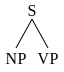

In [3]:
svgling.draw_tree(("S", "NP", "VP"))

As a shortcut, the outer bracketing here can be omitted:

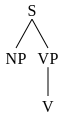

In [4]:
svgling.draw_tree("S", "NP", ("VP", "V"))

Multi-line nodes are generally possible. Simply provide the node as a string that includes `\n` where a linebreak is desired. The next example, a more complex tree with multi-line leaf nodes, also shows how to get the leaf nodes to be lined up with each other. (This tree is from Carnie 2013, *Syntax: a generative introduction (3rd ed.)*, p. 93.)

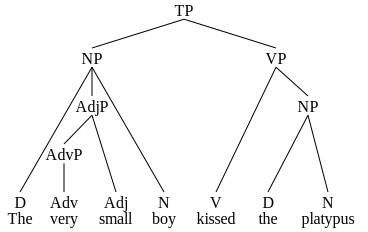

In [5]:
svgling.draw_tree("TP", ("NP", "D\nThe", ("AdjP", ("AdvP", "Adv\nvery"), "Adj\nsmall"), "N\nboy"), ("VP", "V\nkissed", ("NP", "D\nthe", "N\nplatypus")), leaf_nodes_align=True)

## More advanced tricks

The `svgling` package supports a wide range of complex formatting as well as "tree annotations" like movement arrows. The following example provides a quick illustration; see the full package manual for a complete list of possible formatting options.

Next is an even more complex example, a typical tree for Quantifier Raising in the Heim & Kratzer 1998 ("Semantics in Generative Grammar") style, illustrating movement arrows and tree annotation from the `svgling.figure` module.

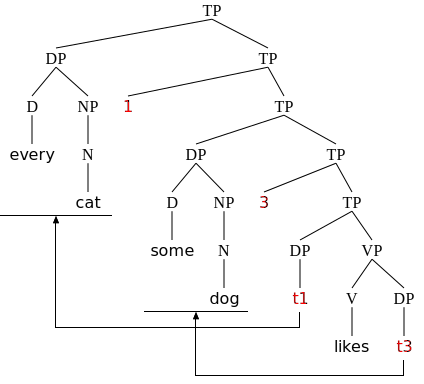

In [43]:
t2 = ("TP", ("DP", ("D", "every"), ("NP", ("N", "cat"))),
           ("TP", "1", ("TP", ("DP", ("D", "some"), ("NP", ("N", "dog"))),
                     ("TP", "3", ("TP", ("DP", "t1"), ("VP", ("V", "likes"), ("DP", "t3")))))))

svgling.core.reset_defaults() # reset any defaults in case this is run out of order
f = svgling.core.cssfont("verdana, arial, sans-serif", style="oblique")

(svgling.draw_tree(t2, leaf_padding=3) # use a slightly wider padding than the default
    # mark binders and traces in red
    .set_node_style((1,0), text_color="red")
    .set_node_style((1,1,1,0), text_color="red")
    .set_node_style((1,1,1,1,0,0), text_color="red")
    .set_node_style((1,1,1,1,1,1,0), text_color="red")
    # set leaf nodes in bold sans-serif
    .set_leaf_style(font_style=f)
    # draw movement arrows and underline moved constituents
    .movement_arrow((1,1,1,1,0), (0,))
    .underline_constituent((0,))
    .movement_arrow((1,1,1,1,1,1), (1,1,0))
    .underline_constituent((1,1,0)))

# Integration with other packages

`svgling` is designed to be used with Jupyter out of the box, and any Jupyter frontend or rendering engine that supports rich display objects and SVG (Jupyter Lab, Jupyter nbconvert, quarto+html, VSCode, Colab, etc) should be able to handle any of the core diagram features. In fact, this website is generated entirely via Jupyter+quarto. Please [report](https://github.com/rawlins/svgling/issues) incompatibilities!

## Integration with NLTK

The `svgling` package is well-integrated with the `nltk` (https://www.nltk.org/) package. This package uses `svgling` for rendering of `nltk.tree.Tree` objects in Jupyter by default (using it to implement a `_repr_svg_()`, and `svgling` supports `nltk.tree.Tree` objects in any context where a tree can be provided.

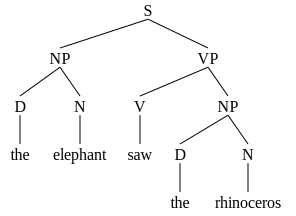

In [7]:
import nltk
t3 = nltk.Tree.fromstring("(S (NP (D the) (N elephant)) (VP (V saw) (NP (D the) (N rhinoceros))))")
t3

Options available as named parameters can also be set on a global basis by modifying the options object at `svgling.core.default_options`, and this provides a quick way to change settings for nltk trees. For example, to change font size for all rendered trees:

```python
svgling.core.default_options.font_size = 20
```

Global defaults can be reset via `svgling.core.reset_defaults()`.

For more complex styling of nltk trees, including tree annotations, you can directly supply a `nltk.tree.Tree` object to `svgling.draw_tree`:

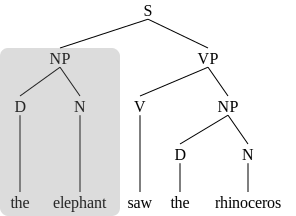

In [35]:
svgling.draw_tree(t3, leaf_nodes_align=True).box_constituent((0,))

Other parts of `svgling` support `Tree`s as well, in particular, the `svgling.figure` utility classes.

## Exporting to raster formats

The `svgling` packages supports exporting to raster formats via `cairosvg`. Convenience wrappers are provided via `svgling.util`, and the full `cairosvg` api can be used as well. See the manual for more details, but here is an example of one of `t3` as a png:

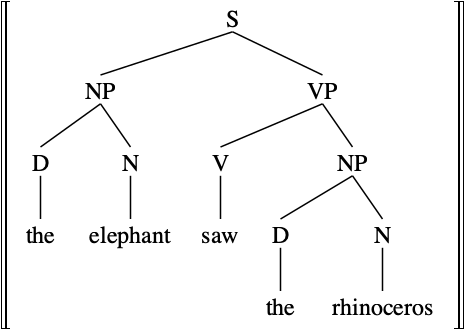

In [9]:
import cairosvg # this cell needs cairosvg in order to run
import svgling.utils, svgling.semantics
from IPython.display import Image
t = svgling.semantics.DoubleBrackets(t3)
Image(svgling.utils.svg2png(t, scale=1.5))

# Future directions for `svgling`

For core syntactic tree-drawing goals, `svgling` is relatively feature complete. However, there are many possible future additions, and SVG is an extremely powerful and flexible drawing tool. If you have specific requests, let me know, either via the [issue tracker](https://github.com/rawlins/svgling/issues) or via email.

Here are some possible future additions, to give a sample. Pull requests are welcome!

* labels along edges
* api for more fine-grained manual spacing adjustment
* better support for complex node contents
* support for linguistic diagrams from phonology and morphology. (There is already some limited support for semantics-related diagrams.)
* (harder) more automatic resizing of trees via Javascript
* (harder) put MathJax/katex output in SVG nodes, perhaps using SVG `foreignObject`. Support `foreignObject` nodes in general. (Right now, there is support for trees with latex content via the `svgling.html` package.)
* (very hard) allow interactive positioning of nodes or trees via javascript.
* (doable but a lot of work) dependency parsing trees